# SAMSHA MH-CLD

## Environment

In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd

# For visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Acquisition of Data

In [3]:
# Read a csv file
df = pd.read_csv('../data/csv/mhcld_puf_2022.csv')

In [4]:
df.shape

(6957919, 40)

In [5]:
df.head()

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,IJSSERVICE,MH1,MH2,MH3,SUB,MARSTAT,SMISED,SAP,EMPLOY,DETNLF,VETERAN,LIVARAG,NUMMHS,TRAUSTREFLG,ANXIETYFLG,ADHDFLG,CONDUCTFLG,DELIRDEMFLG,BIPOLARFLG,DEPRESSFLG,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
0,2022,14,-9,3,3,2,2,1,2,2,2,11,-9,-9,-9,1,-9,-9,-9,-9,-9,-9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6,3,20220000001
1,2022,7,3,3,4,1,2,1,2,2,2,7,11,-9,-9,2,1,1,4,-9,2,2,2,0,0,0,0,0,0,1,0,0,0,1,0,0,1,6,3,20220000002
2,2022,8,3,3,-9,2,2,1,1,2,2,-9,-9,-9,-9,1,3,2,4,-9,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,3,20220000003
3,2022,14,4,4,2,2,1,1,2,2,2,11,-9,-9,-9,4,1,2,5,1,2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6,3,20220000004
4,2022,3,-9,4,6,2,2,1,1,2,2,7,2,-9,-9,1,2,1,-9,-9,-9,-9,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,6,3,20220000005


### Drop unnecessary columns

In [6]:
df = df.drop(columns=['YEAR',
                      'EDUC',
                      'ETHNIC',
                      'SPHSERVICE',
                      'CMPSERVICE',
                      'OPISERVICE',
                      'RTCSERVICE',
                      'IJSSERVICE',
                      'NUMMHS',
                      'DIVISION',
                      'CASEID',
                     ])

In [7]:
df.head()

,AGE,RACE,GENDER,MH1,MH2,MH3,SUB,MARSTAT,SMISED,SAP,EMPLOY,DETNLF,VETERAN,LIVARAG,TRAUSTREFLG,ANXIETYFLG,ADHDFLG,CONDUCTFLG,DELIRDEMFLG,BIPOLARFLG,DEPRESSFLG,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,REGION
0,14,3,2,11,-9,-9,-9,1,-9,-9,-9,-9,-9,-9,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3
1,7,4,1,7,11,-9,-9,2,1,1,4,-9,2,2,0,0,0,0,0,0,1,0,0,0,1,0,0,1,3
2,8,-9,2,-9,-9,-9,-9,1,3,2,4,-9,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
3,14,2,2,11,-9,-9,-9,4,1,2,5,1,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3
4,3,6,2,7,2,-9,-9,1,2,1,-9,-9,-9,-9,0,1,0,0,0,0,1,0,0,0,0,0,0,1,3


In [8]:
df.to_csv('../data/ml/2022.csv', index=False)

## Exploratory Data Analysis

### Check for missing values

In [9]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
AGE,0,0.0,0,0.0,0,0.0
RACE,0,0.0,0,0.0,0,0.0
GENDER,0,0.0,0,0.0,0,0.0
MH1,0,0.0,0,0.0,0,0.0
MH2,0,0.0,0,0.0,0,0.0
MH3,0,0.0,0,0.0,0,0.0
SUB,0,0.0,0,0.0,0,0.0
MARSTAT,0,0.0,0,0.0,0,0.0
SMISED,0,0.0,0,0.0,0,0.0
SAP,0,0.0,0,0.0,0,0.0


### Show Value Counts

In [10]:
def show_value_counts(df):
    for column in df.columns:
        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())
        print("\n" + "-"*50 + "\n")

show_value_counts(df)

Value counts for column 'AGE':
AGE
 1     821837
 7     647394
 6     609496
 8     568037
 3     524220
 2     507579
 9     492488
 12    421036
 11    420415
 5     419311
 14    412055
 10    403167
 13    352137
 4     350683
-9       8064
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'RACE':
RACE
 5    3976917
 3    1184756
-9     841091
 6     695745
 1     137225
 2     100417
 4      21768
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'GENDER':
GENDER
 2    3703705
 1    3238609
-9      15605
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'MH1':
MH1
 7     1433443
-9     1058221
 1      934642
 2      890929
 11     662497
 6      579510
 13     499300
 3      392393
 12     236450
 8       76569
 9       68282
 4       61726
 10      47741
 5       16216
Name: count, dtype: int64

----------------------------

### Correlation between Feature Variables

<Axes: >

Text(0.5, 1.0, 'Correlations Between Something and Somethings')

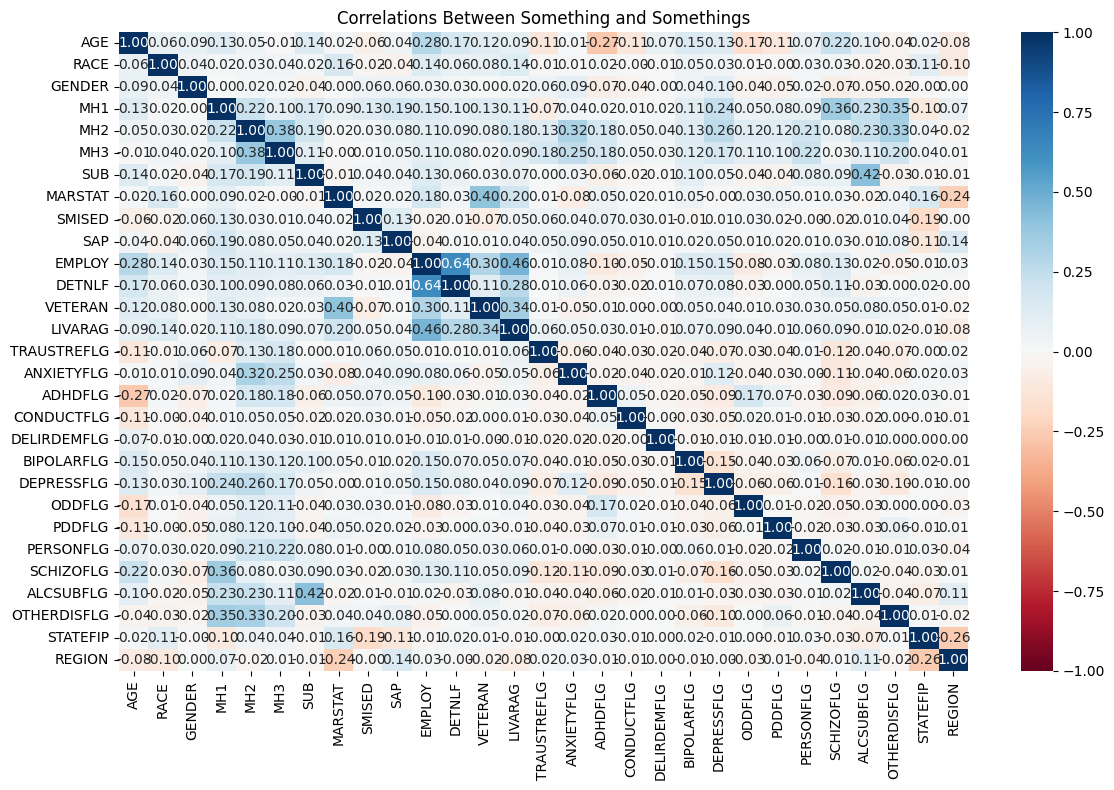

In [11]:
# Use the default Pearson for continuous variables
corr_matrix = df.corr(method ='pearson')

# Setup
fig, ax = plt.subplots(figsize=(12,8))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Something and Somethings")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

In [12]:
df = df.drop(columns=['DETNLF',
                      'SUB',
                      'SAP'
                     ])

### Visualize value counts

In [13]:
def plot_value_counts(df, column_name):
    # Get value counts
    value_counts = df[column_name].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

    # Add titles and labels
    plt.title(f"Value Counts of '{column_name}'", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the values on the bars
    for index, value in enumerate(value_counts):
        plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

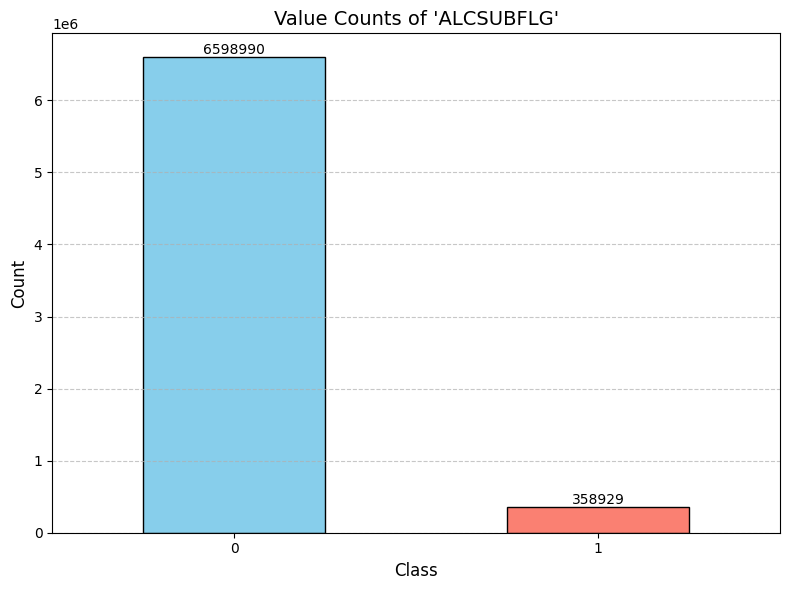

In [14]:
plot_value_counts(df, 'ALCSUBFLG')

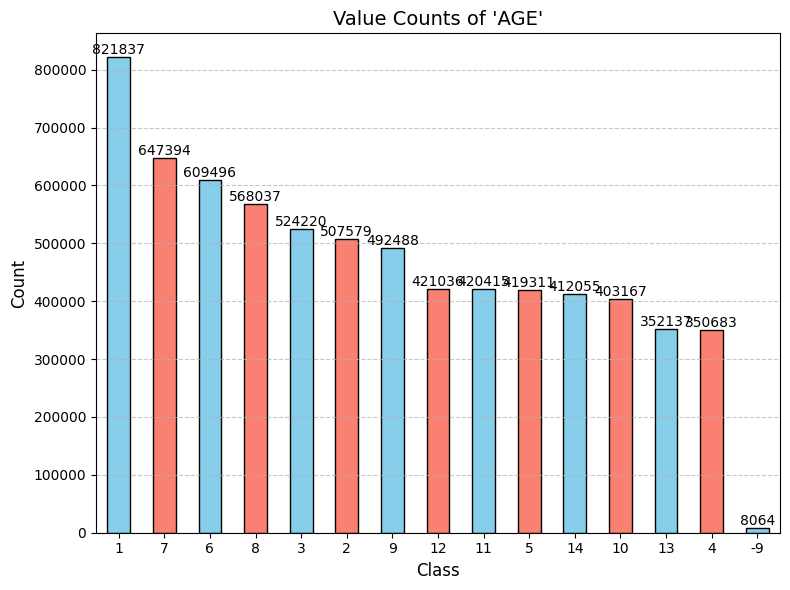

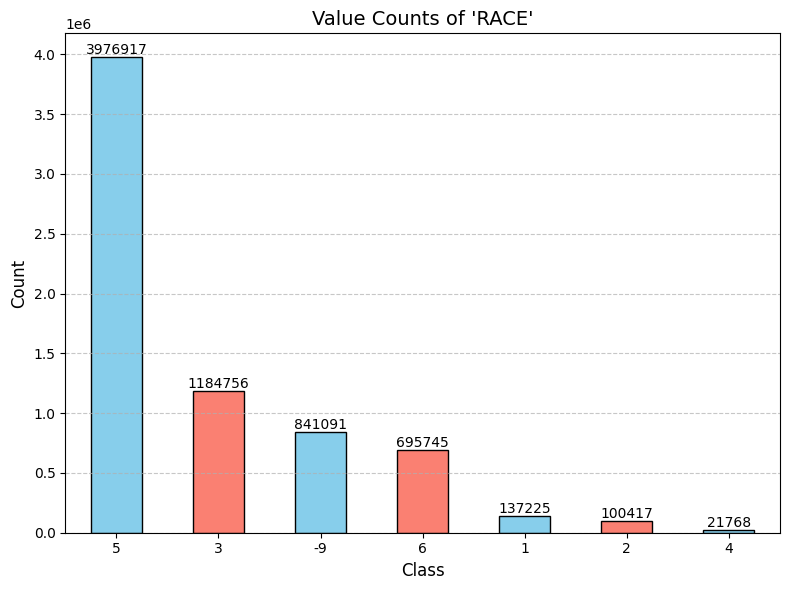

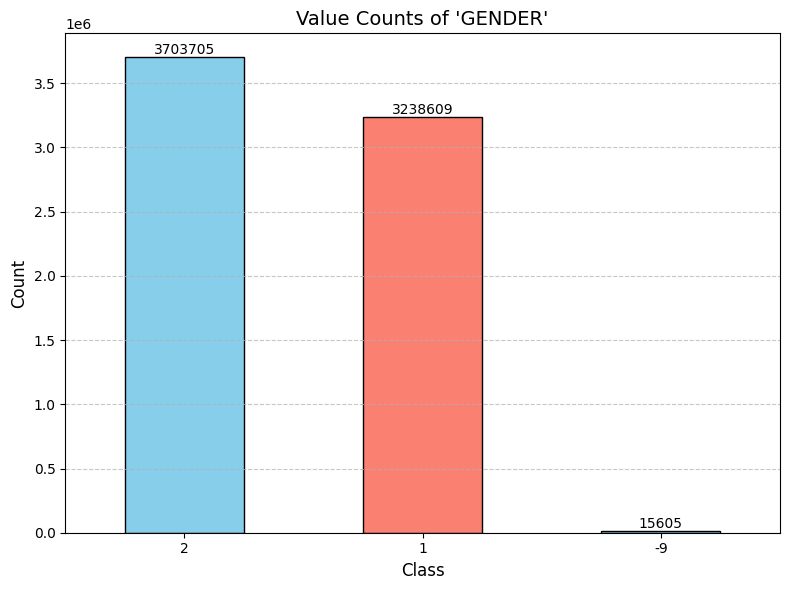

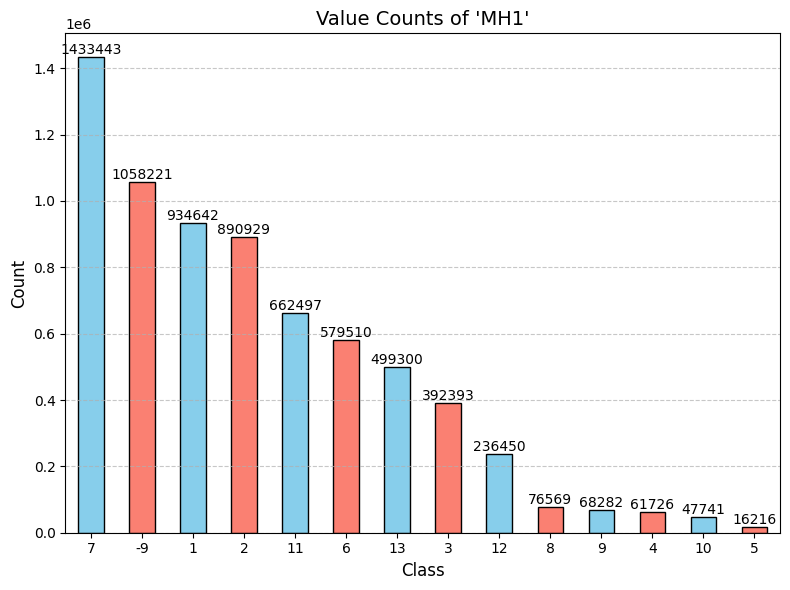

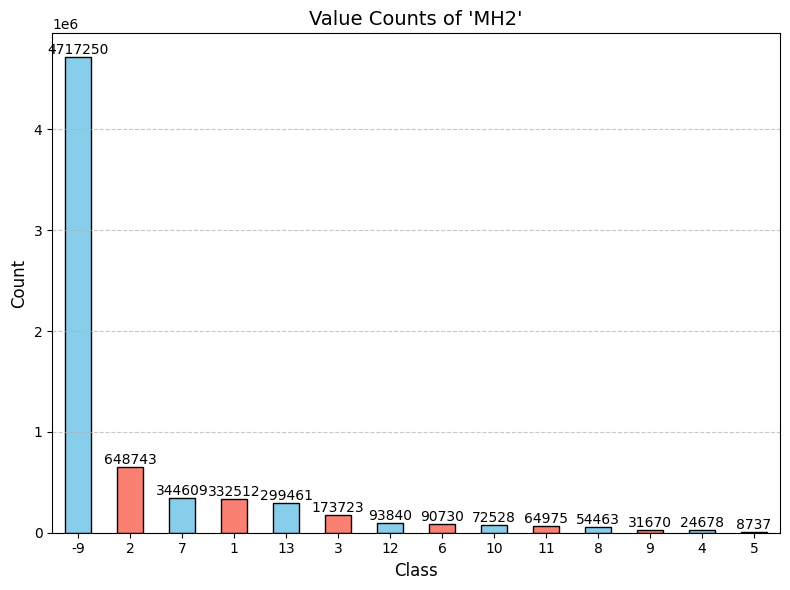

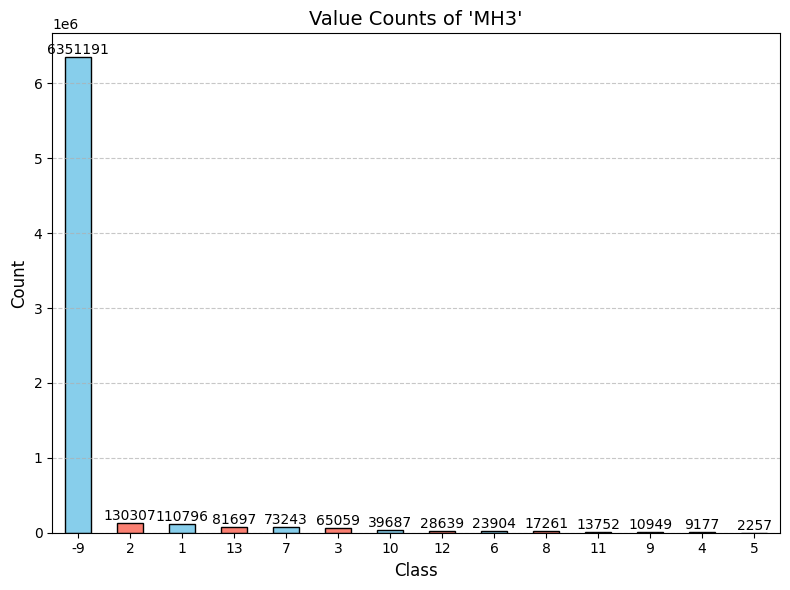

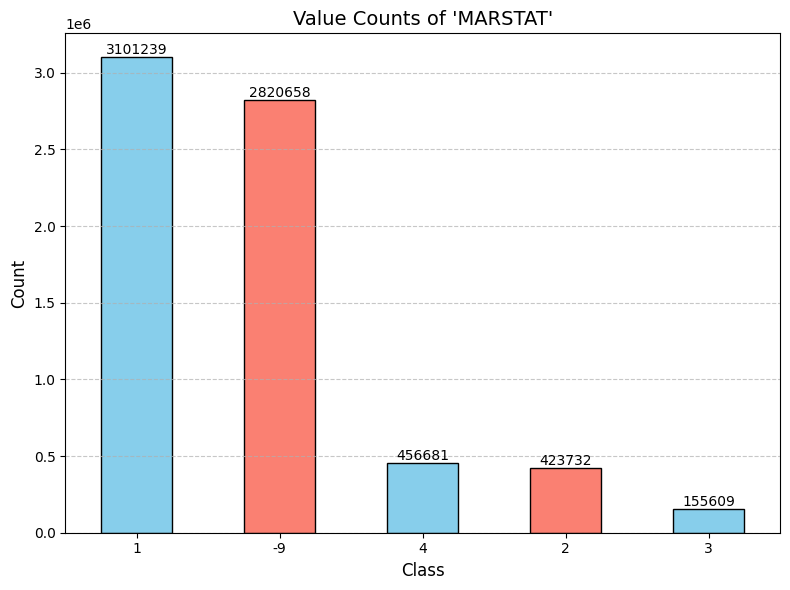

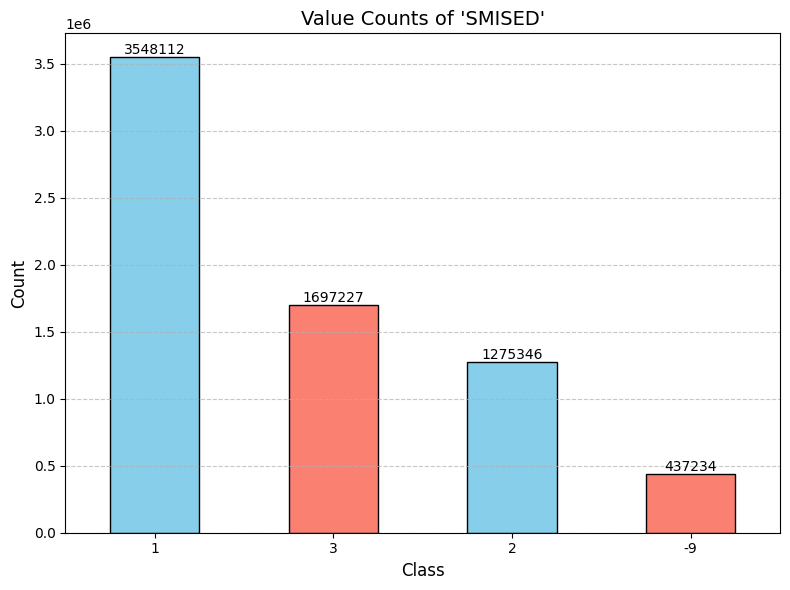

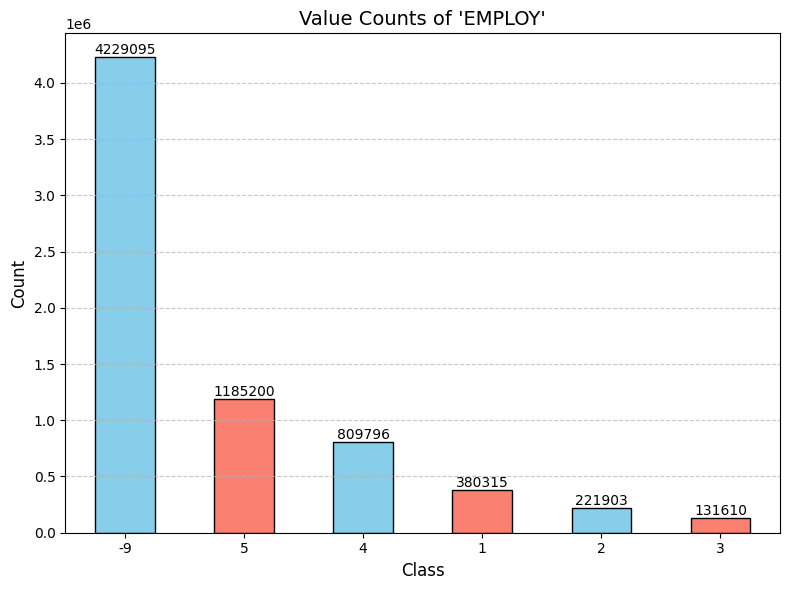

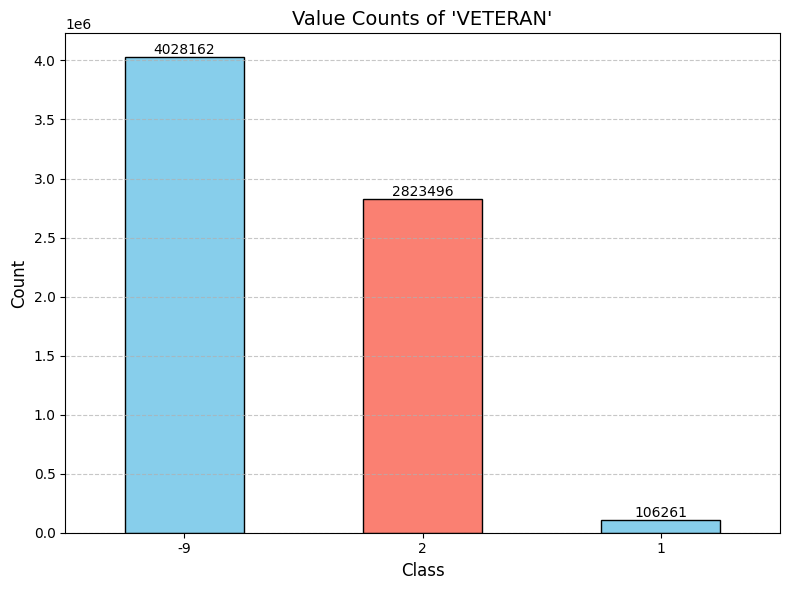

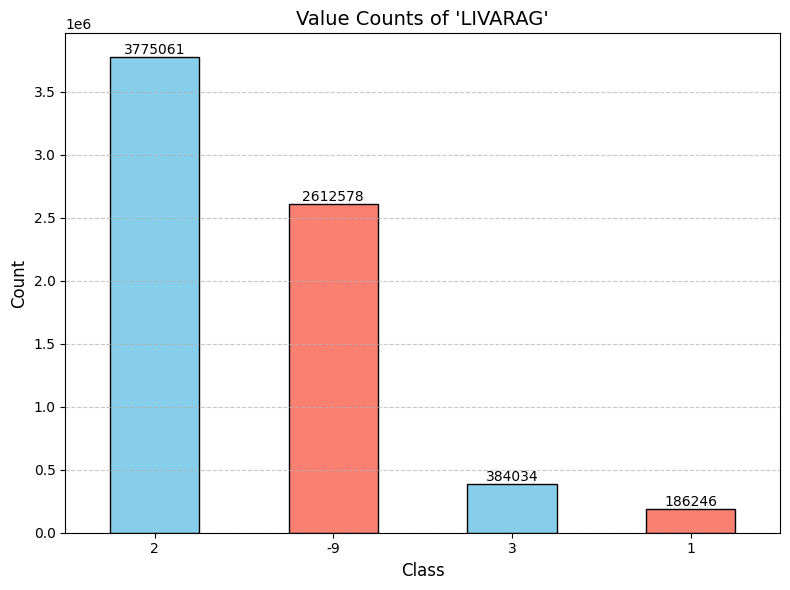

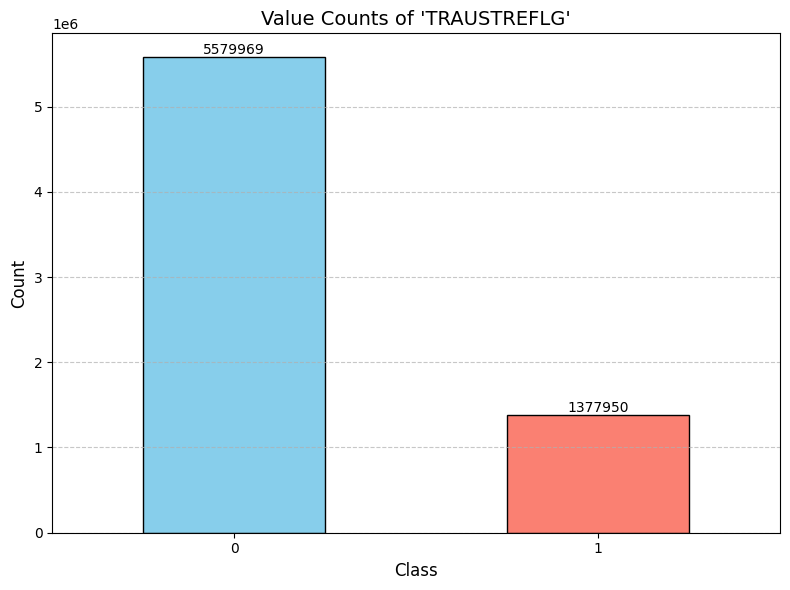

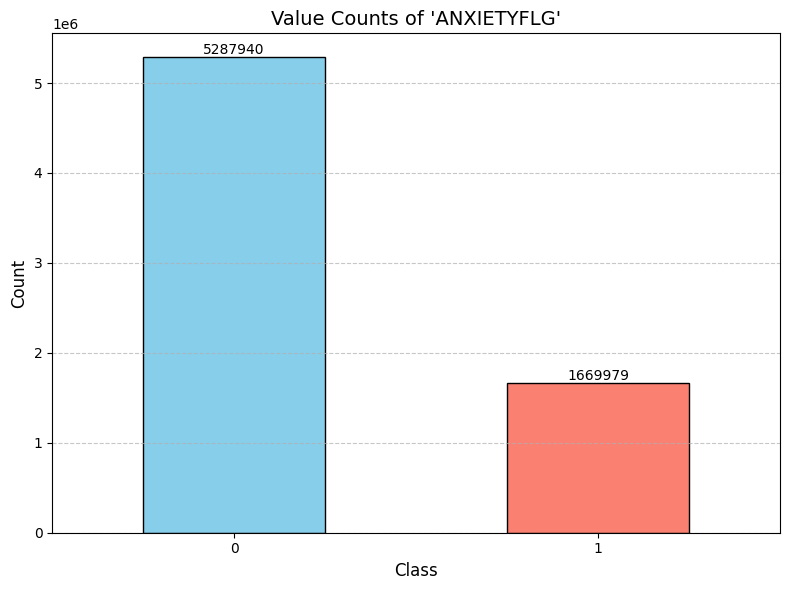

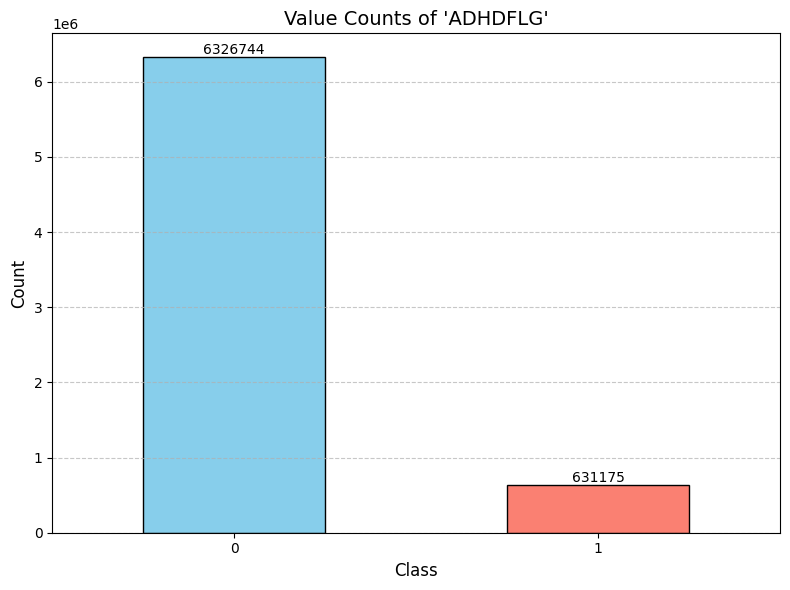

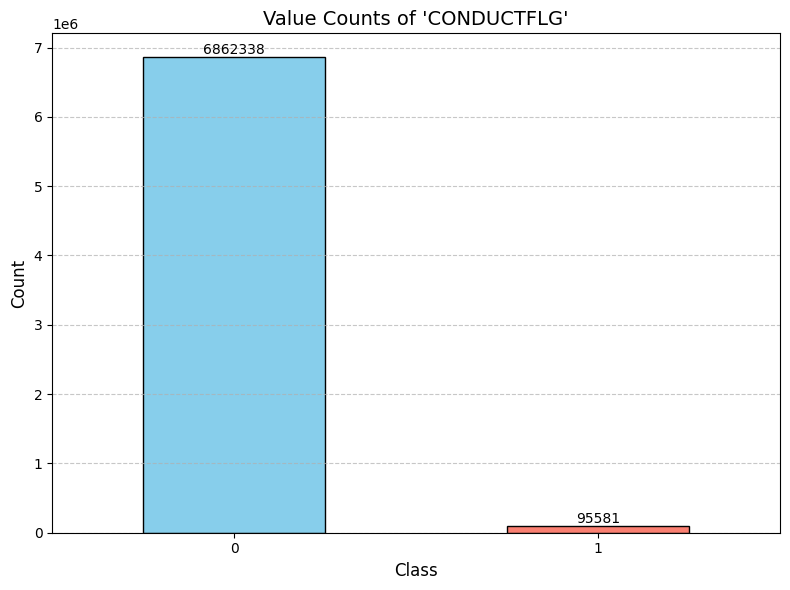

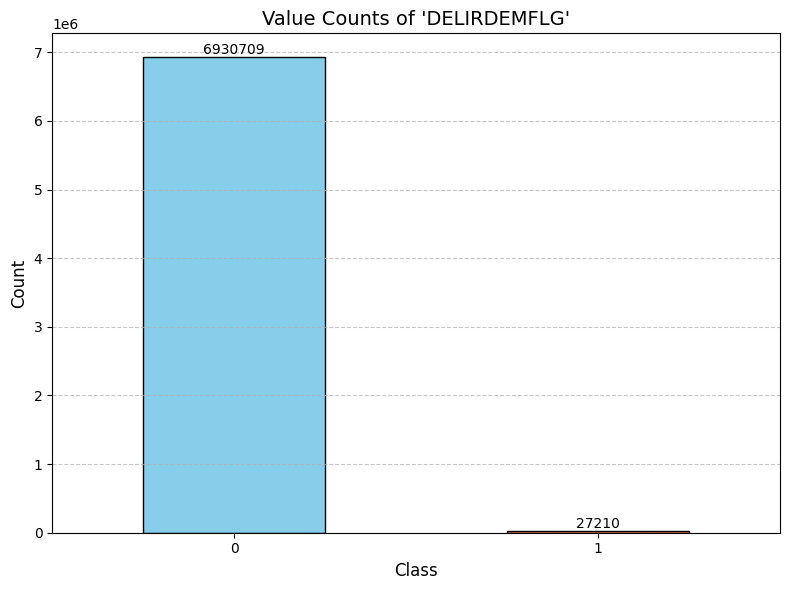

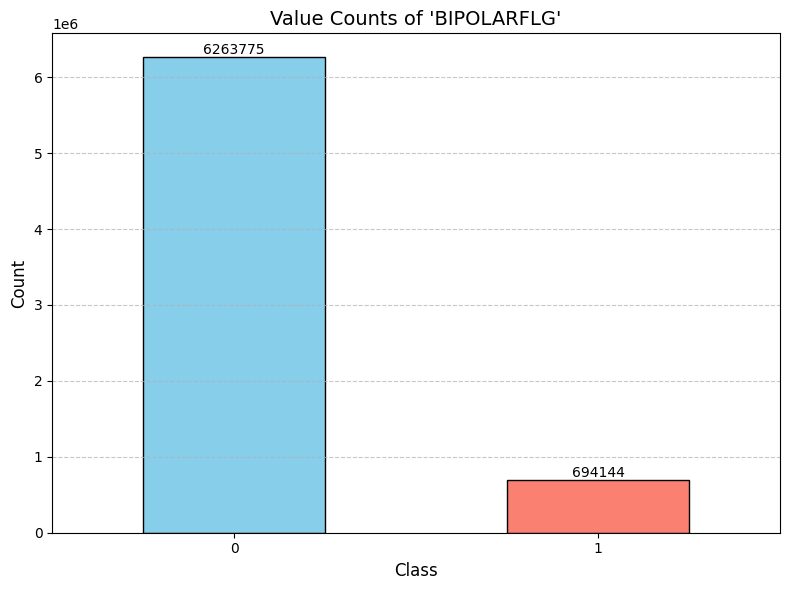

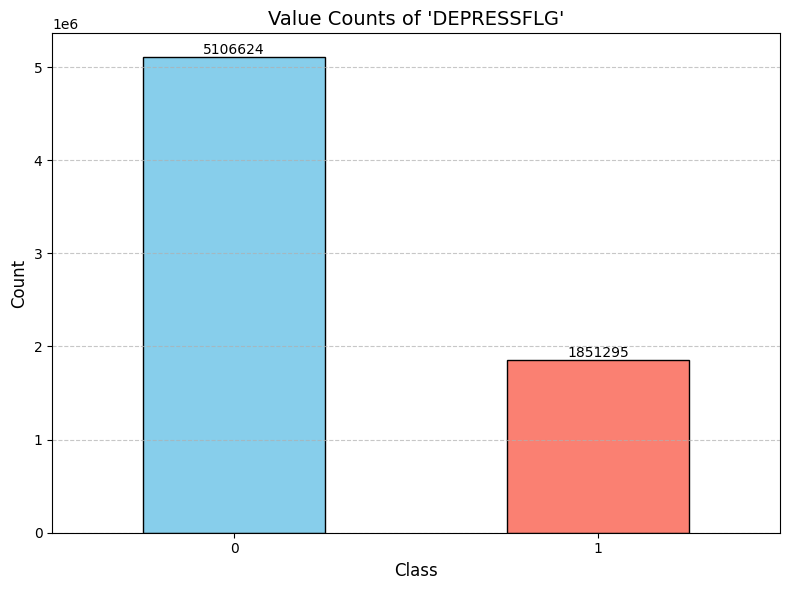

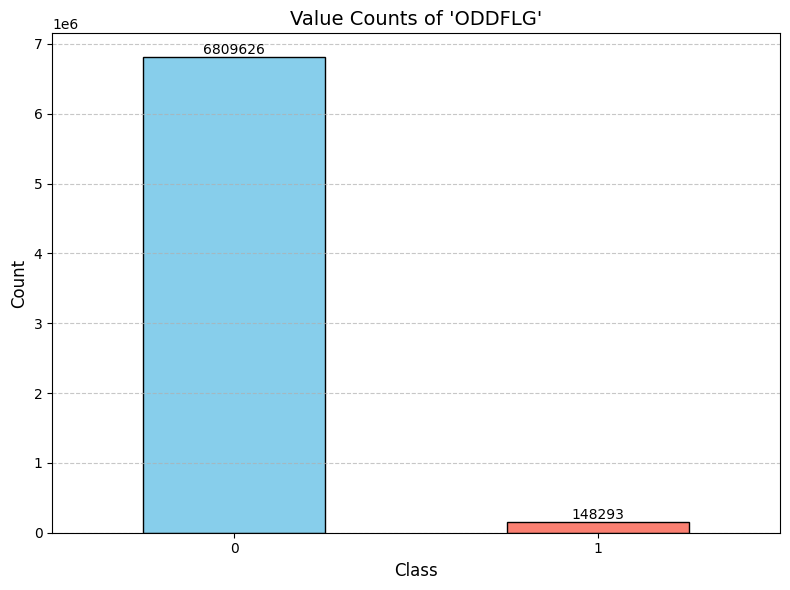

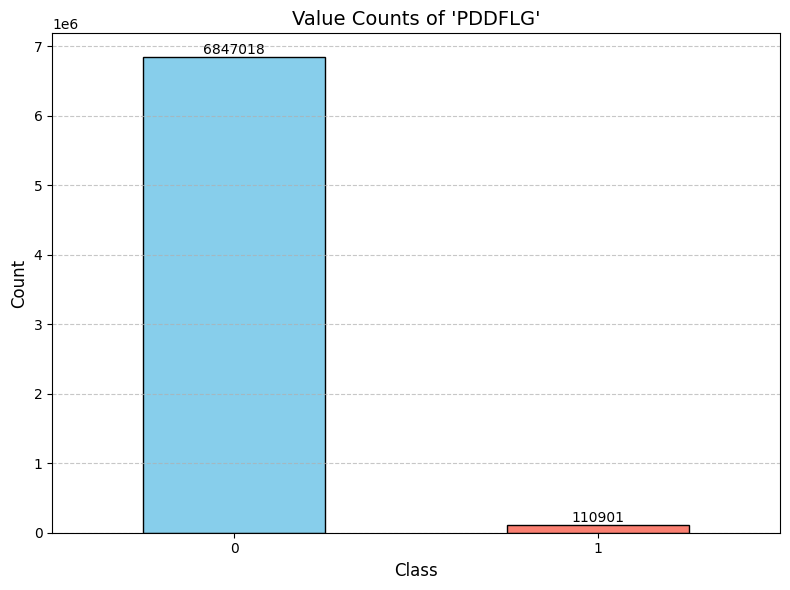

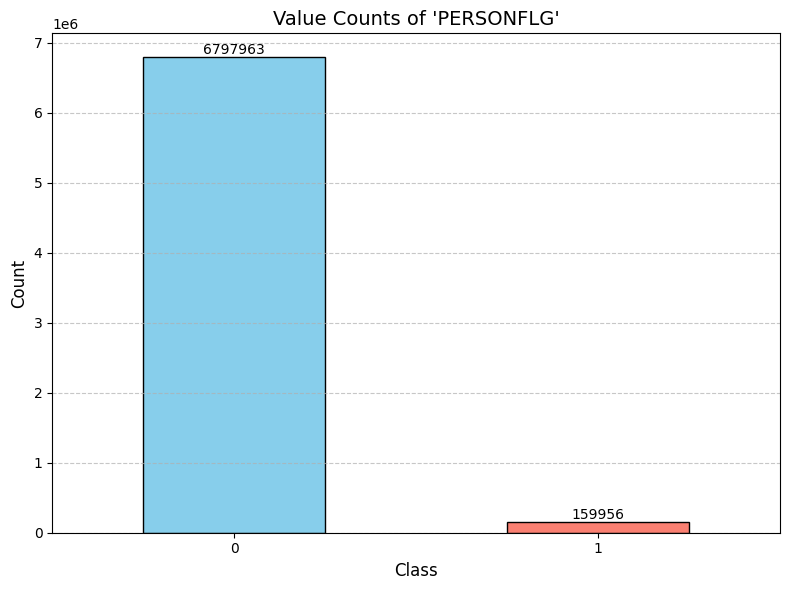

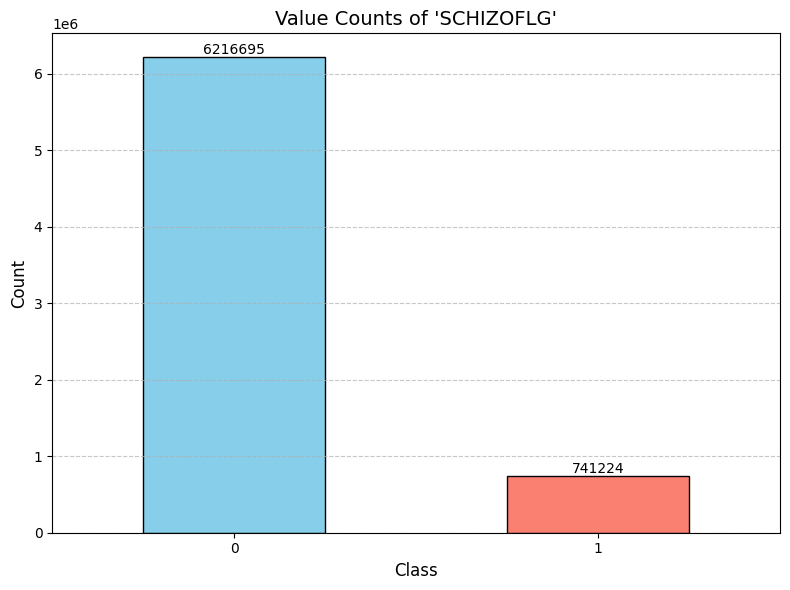

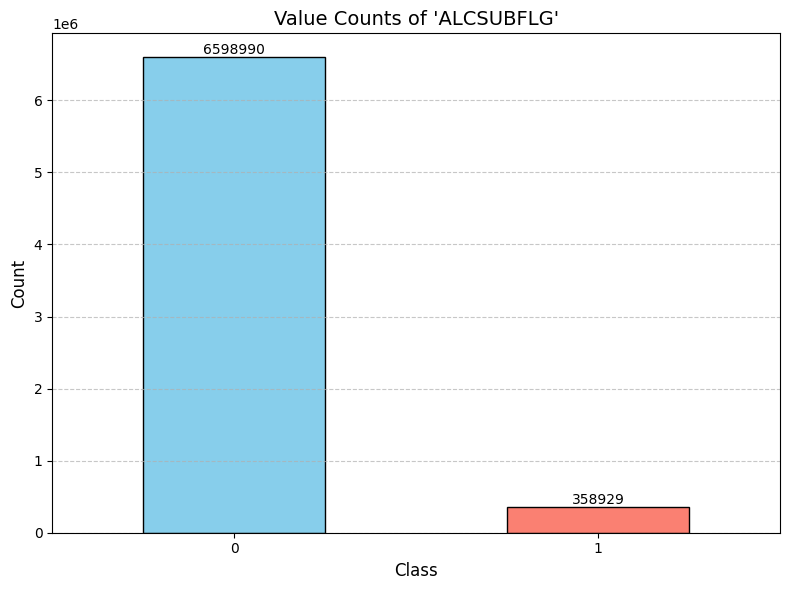

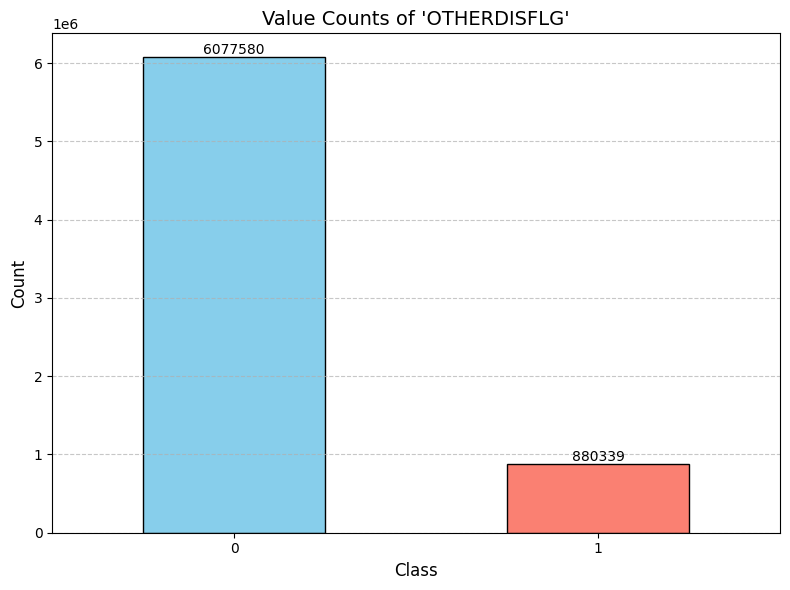

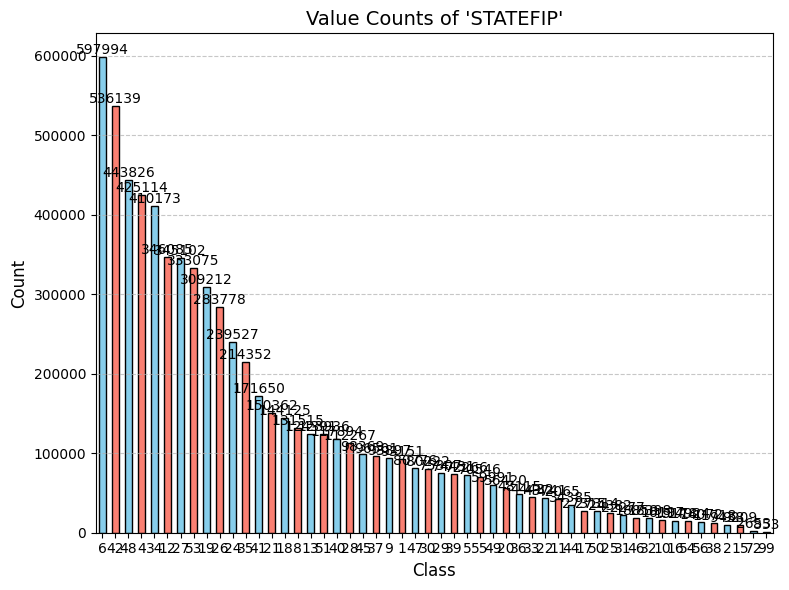

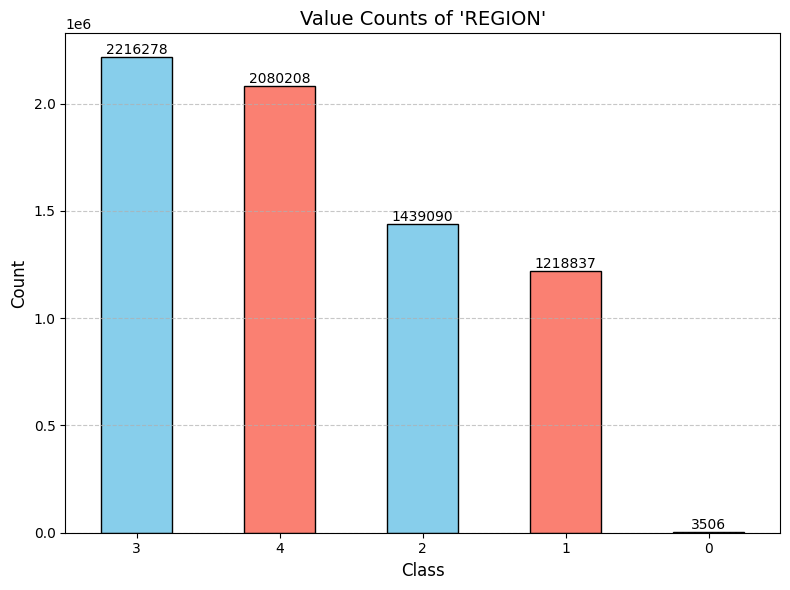

In [24]:
for col in df.columns:
    plot_value_counts(df, col)

In [26]:
df.columns

Index(['AGE', 'RACE', 'GENDER', 'MH1', 'MH2', 'MH3', 'MARSTAT', 'SMISED',
       'EMPLOY', 'VETERAN', 'LIVARAG', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'REGION'],
      dtype='object')

### Bivariate analysis

<Axes: xlabel='AGE', ylabel='ALCSUBFLG'>

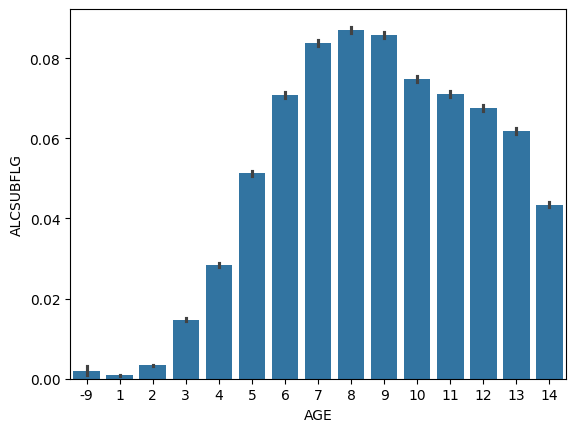

In [38]:
sns.barplot(x='AGE', y='ALCSUBFLG', data=df)

<Axes: xlabel='RACE', ylabel='ALCSUBFLG'>

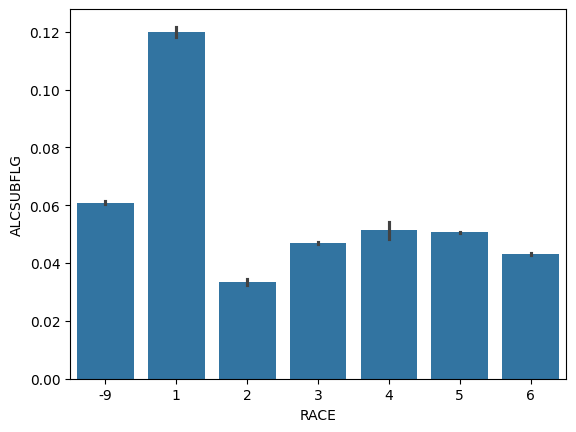

In [39]:
sns.barplot(x='RACE', y='ALCSUBFLG', data=df)

<Axes: xlabel='GENDER', ylabel='ALCSUBFLG'>

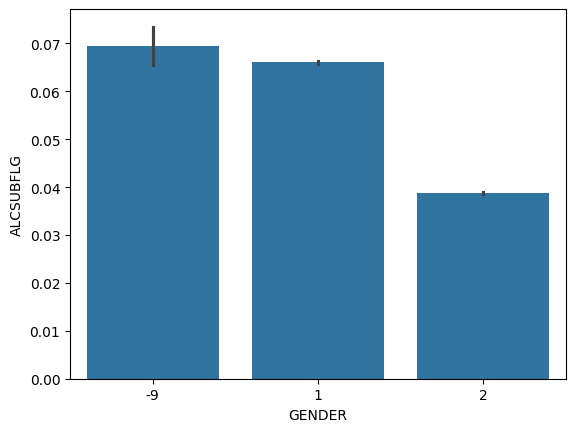

In [40]:
sns.barplot(x='GENDER', y='ALCSUBFLG', data=df)

<Axes: xlabel='MARSTAT', ylabel='ALCSUBFLG'>

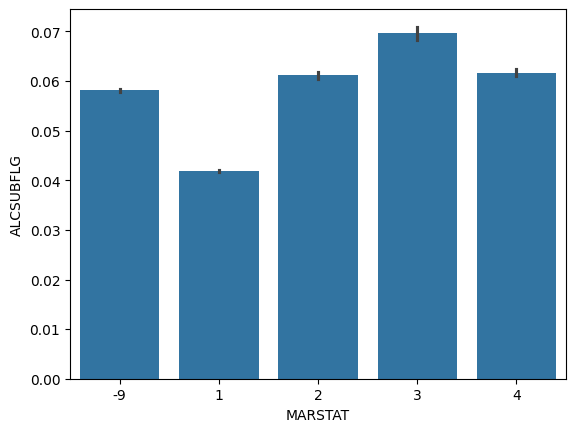

In [41]:
sns.barplot(x='MARSTAT', y='ALCSUBFLG', data=df)

<Axes: xlabel='SMISED', ylabel='ALCSUBFLG'>

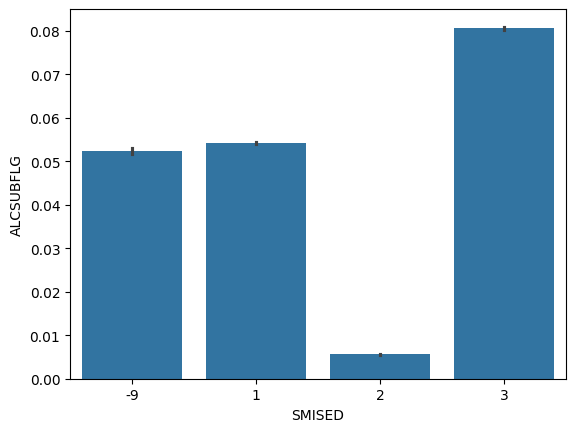

In [42]:
sns.barplot(x='SMISED', y='ALCSUBFLG', data=df)

<Axes: xlabel='EMPLOY', ylabel='ALCSUBFLG'>

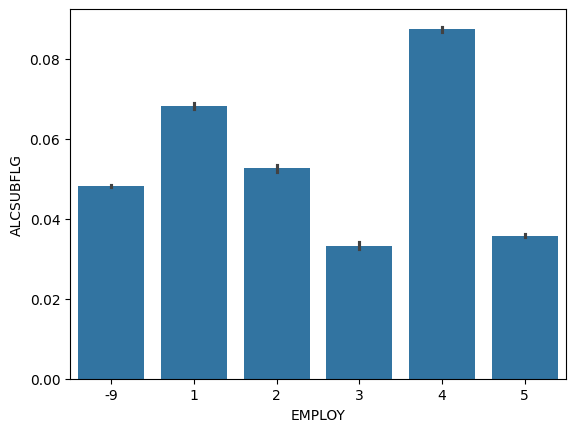

In [43]:
sns.barplot(x='EMPLOY', y='ALCSUBFLG', data=df)

<Axes: xlabel='VETERAN', ylabel='ALCSUBFLG'>

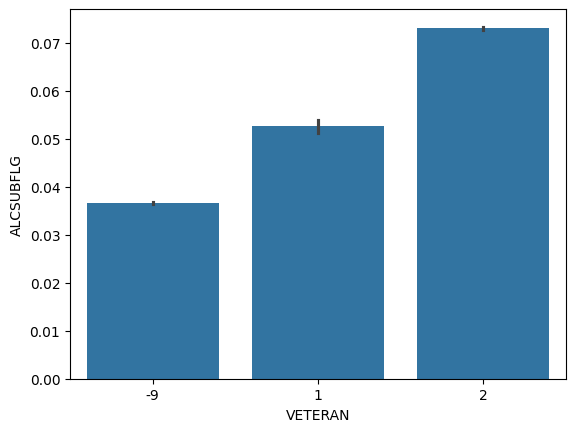

In [44]:
sns.barplot(x='VETERAN', y='ALCSUBFLG', data=df)

<Axes: xlabel='LIVARAG', ylabel='ALCSUBFLG'>

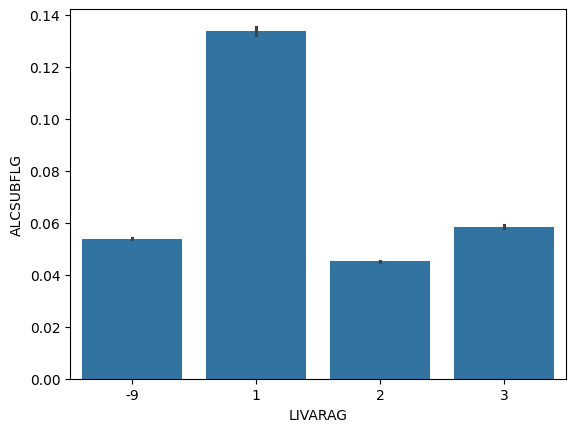

In [45]:
sns.barplot(x='LIVARAG', y='ALCSUBFLG', data=df)

<Axes: xlabel='TRAUSTREFLG', ylabel='ALCSUBFLG'>

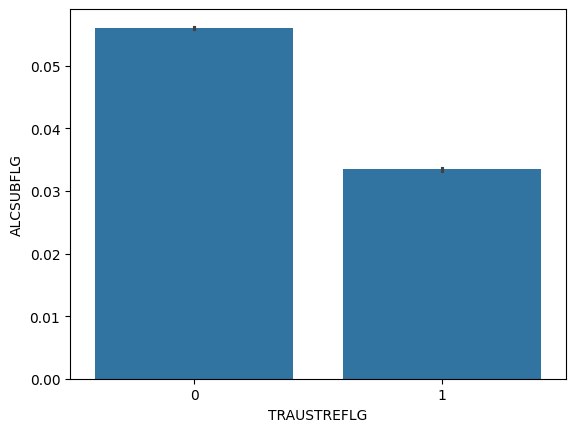

In [46]:
sns.barplot(x='TRAUSTREFLG', y='ALCSUBFLG', data=df)

<Axes: xlabel='ANXIETYFLG', ylabel='ALCSUBFLG'>

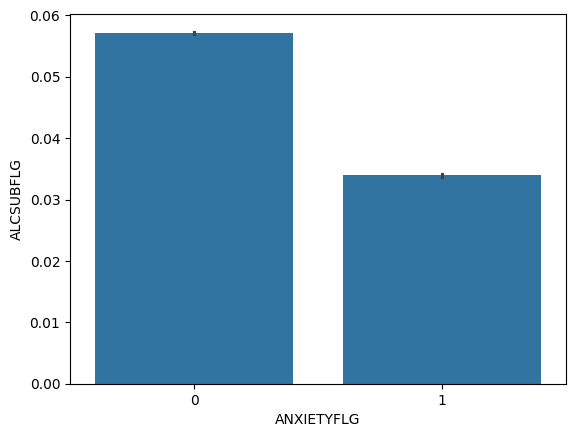

In [47]:
sns.barplot(x='ANXIETYFLG', y='ALCSUBFLG', data=df)

<Axes: xlabel='ADHDFLG', ylabel='ALCSUBFLG'>

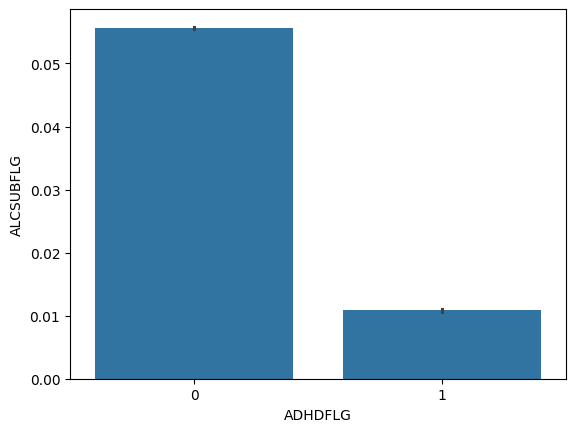

In [48]:
sns.barplot(x='ADHDFLG', y='ALCSUBFLG', data=df)

<Axes: xlabel='CONDUCTFLG', ylabel='ALCSUBFLG'>

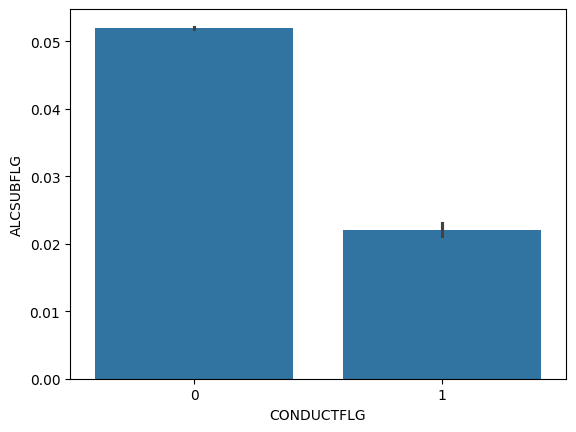

In [49]:
sns.barplot(x='CONDUCTFLG', y='ALCSUBFLG', data=df)

MemoryError: Unable to allocate 52.9 MiB for an array with shape (6930709,) and data type float64

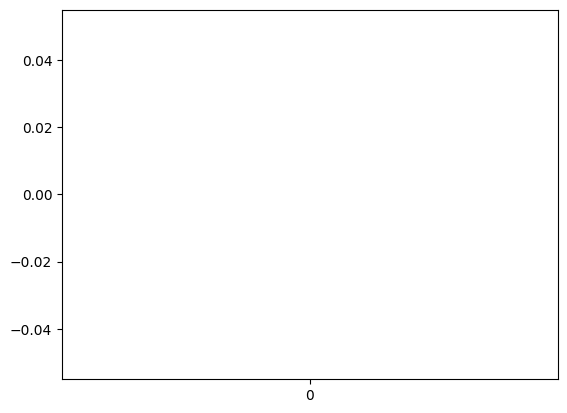

In [50]:
sns.barplot(x='DELIRDEMFLG', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='BIPOLARFLG', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='DEPRESSFLG', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='ODDFLG', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='PDDFLG', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='PERSONFLG', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='SCHIZOFLG', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='OTHERDISFLG', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='STATEFIP', y='ALCSUBFLG', data=df)

In [ ]:
sns.barplot(x='REGION', y='ALCSUBFLG', data=df)

### Handling class imbalance

In [15]:
def undersample(df, target_column):
    # Separate the DataFrame by class
    class_counts = df[target_column].value_counts()
    min_class_count = class_counts.min()

    # Sample each class to the size of the minority class
    undersampled_dfs = []
    for class_label in class_counts.index:
        class_df = df[df[target_column] == class_label]
        undersampled_class_df = class_df.sample(n=min_class_count, random_state=42)
        undersampled_dfs.append(undersampled_class_df)
    
    # Concatenate the undersampled classes
    balanced_df = pd.concat(undersampled_dfs).reset_index(drop=True)
    return balanced_df

In [16]:
# Undersample the DataFrame
dfx = undersample(df, 'ALCSUBFLG')

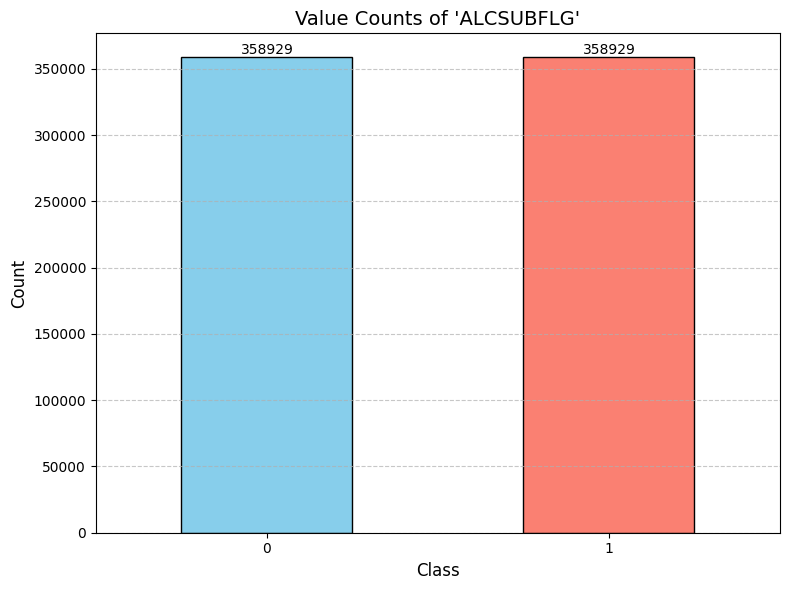

In [17]:
plot_value_counts(dfx, 'ALCSUBFLG')

In [28]:
dfx.shape

(717858, 26)

In [30]:
dfx.to_csv('../data/ml/2022_balanced.csv', index=False)

In [31]:
dfx = pd.read_csv('../data/ml/2022_balanced.csv')

In [34]:
dfx.columns

Index(['AGE', 'RACE', 'GENDER', 'MH1', 'MH2', 'MH3', 'MARSTAT', 'SMISED',
       'EMPLOY', 'VETERAN', 'LIVARAG', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'REGION'],
      dtype='object')